In [1]:
# Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Import Data

data = pd.read_csv("D:\Elections_DataProject\election_results_2024.csv")
data.head()


,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared


Total Seats Won Analysis

C:\Users\dewan\AppData\Local\Temp\ipykernel_15208\1561855444.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


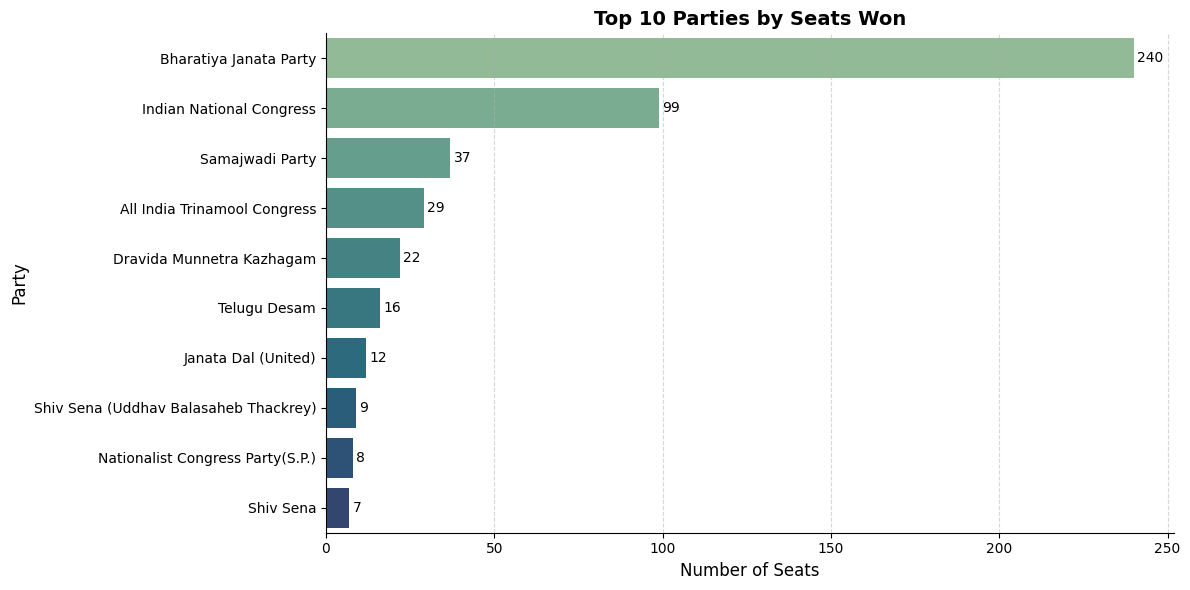

In [11]:
# Count total seats per party
party_seats = data['Leading Party'].value_counts()

# Plot only top 10 parties (can increase if needed)
top_n = 10
party_seats_top = party_seats.head(top_n)

plt.figure(figsize=(12,6))
sns.barplot(
    x=party_seats_top.values, 
    y=party_seats_top.index, 
    palette='crest'
)

# Title & labels
plt.title(f"Top {top_n} Parties by Seats Won", fontsize=14, weight='bold')
plt.xlabel("Number of Seats", fontsize=12)
plt.ylabel("Party", fontsize=12)

# Add data labels on bars
for index, value in enumerate(party_seats_top.values):
    plt.text(value + 1, index, str(value), va='center', fontsize=10)

# Cleaner look
sns.despine()
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


Seats won with Highest and Lowest Margins

In [ ]:

# Ensure Margin is numeric (if it's stored as string with commas etc.)
data['Margin'] = pd.to_numeric(data['Margin'], errors='coerce')

# Find highest and lowest margin candidates
highest_margin = data.loc[data['Margin'].idxmax()]
lowest_margin = data.loc[data['Margin'].idxmin()]

# Print results 

print(f"🏆 Highest Margin: {highest_margin['Leading Candidate']} from {highest_margin['Constituency']} "
      f"with {highest_margin['Margin']:,} votes")
print(f"⚠️ Lowest Margin: {lowest_margin['Leading Candidate']} from {lowest_margin['Constituency']} "
      f"with {lowest_margin['Margin']:,} votes")


🏆 Highest Margin: SHANKAR LALWANI from INDORE with 1,175,092.0 votes
⚠️ Lowest Margin: RAVINDRA DATTARAM WAIKAR from Mumbai North West with 48.0 votes


Star Candidate Constituencies

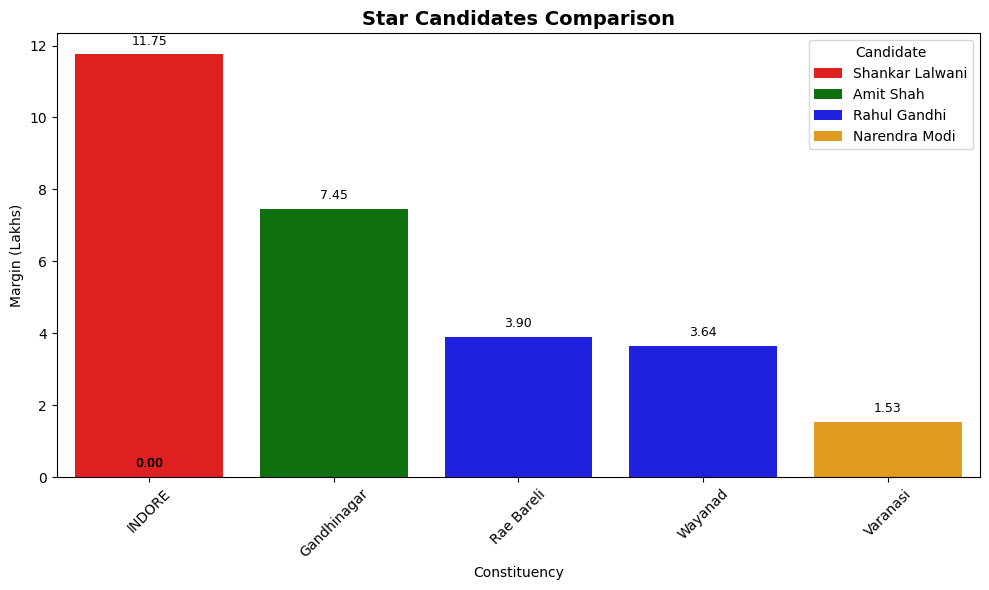

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ------------------------------
# Filter data for selected star candidates
# ------------------------------
NarendraModi = data[data['Leading Candidate'] == 'NARENDRA MODI']
AmitShah = data[data['Leading Candidate'] == 'AMIT SHAH']
RahulGandhi = data[data['Leading Candidate'] == 'RAHUL GANDHI']
ShankarLalwani = data[data['Leading Candidate'] == 'SHANKAR LALWANI']

# ------------------------------
# Extract votes (margin) and constituencies for each candidate
# ------------------------------
rahul_votes = RahulGandhi['Margin'].values
rahul_constituencies = list(RahulGandhi['Constituency'])

modi_votes = NarendraModi['Margin'].values[0] if not NarendraModi.empty else 0
amit_votes = AmitShah['Margin'].values[0] if not AmitShah.empty else 0
lalwani_votes = ShankarLalwani['Margin'].values[0] if not ShankarLalwani.empty else 0

modi_constituency = NarendraModi['Constituency'].values[0] if not NarendraModi.empty else "Varanasi"
amit_constituency = AmitShah['Constituency'].values[0] if not AmitShah.empty else "Gandhinagar"
lalwani_constituency = ShankarLalwani['Constituency'].values[0] if not ShankarLalwani.empty else "Indore"

# ------------------------------
# Combine candidate + constituency + margin into one DataFrame
# ------------------------------
data_to_plot = pd.DataFrame({
    'Candidate': ['Rahul Gandhi'] * len(rahul_votes) + ['Narendra Modi', 'Amit Shah', 'Shankar Lalwani'],
    'Constituency': rahul_constituencies + [modi_constituency, amit_constituency, lalwani_constituency],
    'Votes': list(rahul_votes) + [modi_votes, amit_votes, lalwani_votes]
})

# Remove commas (if numbers have commas) and convert to integers
data_to_plot['Votes'] = data_to_plot['Votes'].replace(',', '', regex=True).astype(int)

# Now convert to Lakhs
data_to_plot['Votes (Lakhs)'] = data_to_plot['Votes'] / 100000

# ------------------------------
# Plot Comparison
# ------------------------------
plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=data_to_plot.sort_values('Votes (Lakhs)', ascending=False),  # sort by margin for clarity
    x='Constituency', y='Votes (Lakhs)', hue='Candidate',
    palette={'Rahul Gandhi':'blue', 'Narendra Modi':'orange', 'Amit Shah':'green', 'Shankar Lalwani':'red'}
)

# ------------------------------
# Add annotations (exact margins on top of bars)
# ------------------------------
for p in ax.patches:
    value = p.get_height()
    ax.annotate(f'{value:.2f}', 
                (p.get_x() + p.get_width() / 2., value), 
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

# ------------------------------
# Titles and Labels
# ------------------------------
plt.title('Star Candidates Comparison', fontsize=14, fontweight='bold')
plt.xlabel('Constituency')
plt.ylabel('Margin (Lakhs)')
plt.xticks(rotation=45)
plt.legend(title='Candidate')

plt.tight_layout()
plt.show()

# ------------------------------
# Quick Insights (from visualization):
# - Shankar Lalwani (Indore) has the largest margin (~11.7 lakhs) → massive lead.
# - Amit Shah (Gandhinagar) also enjoys a comfortable margin (>7 lakhs).
# - Narendra Modi (Varanasi) won with ~1.5 lakh margin → much smaller compared to other star leaders.
# - Rahul Gandhi (Rae Bareli & Wayanad) had margins between ~3.6–3.9 lakhs → strong but less than Shah/Lalwani.
# ------------------------------
